# **Problem Statement:**

The problem this project aims to solve is the prediction of car resale prices. The goal is to develop a model that can accurately estimate the resale value of a car based on its features, such as make and model, mileage, engine capacity, fuel type, and other relevant attributes. This information can be valuable for both car buyers and sellers to make informed decisions about pricing and purchasing used cars.


---



# **Goal:**

The primary goal of this project is to develop a predictive model that accurately estimates the resale price of cars based on their features.


---



# **Features:**


full_name: The make and model of the car (e.g., "Maruti Suzuki Swift").

registered_year: The year the car was first registered.

engine_capacity(cc): The engine capacity of the car in cubic centimeters.

insurance: The type of insurance coverage the car has (e.g., "Comprehensive", "Third Party").

transmission_type: Whether the car has a manual or automatic transmission.

kms_driven(km): The total distance the car has been driven in kilometers.

owner_type: Whether the car is first-hand, second-hand, or third-hand.

fuel_type: The type of fuel the car uses (e.g., "Petrol", "Diesel").

max_power: The maximum power output of the car's engine (usually in bhp or PS).

seats: The number of seats in the car.

mileage(kmpl): The fuel efficiency of the car in kilometers per liter.

body_type: The type of car body (e.g., "Sedan", "SUV", "Hatchback").

city: The city where the car is located.



---


**Target Variable:**

The target variable is **resale_price(Lakh)**. This is the variable that the model is trying to predict. In simpler terms, it's the price at which a used car is expected to be resold


In [489]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step1 : Understand the data

In [490]:
#Load csv data set
df=pd.read_csv("/content/car_resale_prices.csv")
df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [491]:
# Preview the first few rows of the dataset
df.head(15)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
5,5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",First Owner,Petrol,81.86bhp,5.0,17.19 kmpl,Hatchback,Agra
6,6,2017 Tata Tiago 1.05 Revotorq XZ,₹ 3.60 Lakh,2017,1047 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Diesel,69bhp,5.0,27.28 kmpl,Hatchback,Agra
7,7,2010 Hyundai i10 Magna 1.1,₹ 2 Lakh,2010,1086 cc,Third Party insurance,Manual,"60,000 Kms",Second Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
8,8,2016 Maruti Eeco 7 Seater Standard BSIV,₹ 3.70 Lakh,2016,1196 cc,Third Party insurance,Manual,"20,000 Kms",First Owner,Petrol,73bhp,7.0,15.37 kmpl,Minivans,Agra
9,9,2009 Hyundai Santro Xing GL,₹ 1.20 Lakh,2009,1086 cc,Third Party insurance,Manual,"30,000 Kms",First Owner,Petrol,62bhp,5.0,NaN,Hatchback,Agra


In [492]:
df.shape

(17446, 15)

In [493]:
df.sample(10)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
5008,5008,2017 Hyundai Verna CRDi 1.6 AT SX Plus,₹ 9.33 Lakh,Oct 2017,1582 cc,Comprehensive,Automatic,"78,356 Kms",First Owner,Diesel,126.2bhp,5.0,22 kmpl,Sedan,Chennai
11743,11743,2011 Mahindra XUV500 W8 2WD,₹ 4.50 Lakh,2011,2179 cc,Third Party insurance,Manual,"1,20,000 Kms",Fourth Owner,Diesel,140bhp,7.0,15.1 kmpl,SUV,Mumbai
1809,1809,2020 Tata Tiago XT BSVI,₹ 4.93 Lakh,Oct 2020,1199 cc,Comprehensive,Manual,"68,843 Kms",First Owner,Petrol,84.82bhp,5.0,19.01 kmpl,Hatchback,Jaipur
7699,7699,2016 Honda Brio S MT,₹ 3.87 Lakh,Apr 2016,1198 cc,Comprehensive,Manual,"70,000 Kms",First Owner,Petrol,86.8bhp,5.0,19.4 kmpl,Hatchback,Pune
5817,5817,2016 Mahindra KUV 100 NXT D75 K6 Plus,₹ 3.50 Lakh,May 2016,1198 cc,Comprehensive,Manual,"13,397 Kms",First Owner,Diesel,77bhp,6.0,25.32 kmpl,Hatchback,Chennai
6162,6162,2013 Honda Amaze VX i-DTEC,₹ 4.90 Lakh,Jul 2013,1498 cc,Third Party insurance,Manual,"67,905 Kms",First Owner,Diesel,98.6bhp,5.0,25.8 kmpl,Sedan,Chennai
1900,1900,2010 Skoda Fabia 1.2 MPI Ambiente Petrol,₹ 2 Lakh,2010,1198 cc,Third Party insurance,Manual,"1,00,000 Kms",Second Owner,Petrol,75 bhp at 5400 rpm,5.0,17.5 kmpl,Hatchback,Jaipur
4831,4831,2022 Mahindra XUV700 AX7 Diesel AT Luxury Pack...,₹ 26.50 Lakh,Sept 2022,2198 cc,Comprehensive,Automatic,"21,000 Kms",First Owner,Diesel,182.38bhp,7.0,NaN,SUV,Ahmedabad
10594,10594,2021 Jeep Compass 1.4 Limited Opt DCT BSVI,₹ 25.50 Lakh,2021,1368 cc,Third Party insurance,Automatic,"10,000 Kms",First Owner,Petrol,160.77bhp,5.0,14.1 kmpl,SUV,Bangalore
13851,13851,2016 Honda City i VTEC CVT VX,₹ 7.18 Lakh,Aug 2016,1497 cc,Comprehensive,Automatic,"81,296 Kms",Second Owner,Petrol,117.3bhp,5.0,18 kmpl,Sedan,Delhi


In [494]:
# Checking the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


# Step2 : Data Cleaning

In [495]:
#Droping the columns "Unnamed: 0 "
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [496]:
#Checking null values
is_null=df.isnull().sum()
is_null

,0
full_name,0
resale_price,0
registered_year,69
engine_capacity,14
insurance,7
transmission_type,0
kms_driven,3
owner_type,45
fuel_type,0
max_power,102


In [497]:
df['registered_year'].value_counts()

,count
registered_year,
2022,399
2017,385
2018,359
2014,354
2016,345
...,...
May 2002,1
Feb 2008,1
Feb 2002,1


In [498]:
#  Changing Dtype  and replacing "registered_year" into 'int'

a=["Jan","Feb" ,"Mar ","Apr","May","Jun","Jul","Aug","Sept","Oct ","Nov","Dec "]
for i in a:
  df["registered_year"]=df["registered_year"].str.replace(i,"")


df["registered_year"]=df["registered_year"].replace().astype(int)


<ipython-input-498-1ba69a02bb04>:8: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["registered_year"]=df["registered_year"].replace().astype(int)


In summary, this code block cleans and prepares the kms_driven column for analysis by:

* Removing unnecessary text and characters

* Converting the data type to integer

* Providing a more descriptive column name

In [499]:
df["engine_capacity"].value_counts()

,count
engine_capacity,
1197 cc,3416
998 cc,1397
1497 cc,988
1199 cc,961
1248 cc,918
...,...
2650 cc,1
1242 cc,1
3471 cc,1


In [500]:
#Changing Dtype  and replacing name "engine_capacity"
df["engine_capacity"]=df["engine_capacity"].str.replace(" cc","")
df["engine_capacity"]=df["engine_capacity"].replace().astype(int)
df.rename(columns={"engine_capacity":"engine_capacity(cc)"},inplace=True)


<ipython-input-500-319b22e64cfa>:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["engine_capacity"]=df["engine_capacity"].replace().astype(int)


In summary, this code block cleans and prepares the engine_capacity column for analysis by:

* Removing unnecessary text (" cc")
* Converting the data type to integer
* Providing a more descriptive column name that includes the unit of measurement.

In [501]:
df['kms_driven'].value_counts()

,count
kms_driven,
"1,20,000 Kms",561
"60,000 Kms",504
"80,000 Kms",490
"50,000 Kms",486
"70,000 Kms",480
...,...
"30,413 Kms",1
"38,329 Kms",1
"66,383 Kms",1


In [502]:
#Changing Dtype  and replacing name "kms_driven"
df["kms_driven"]=df["kms_driven"].str.replace(" Kms","")
df["kms_driven"]=df["kms_driven"].str.replace(",","")
df["kms_driven"]=df["kms_driven"].replace().astype(int)
df.rename(columns={"kms_driven":"kms_driven(km)"},inplace=True)


<ipython-input-502-167aabdcef1e>:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["kms_driven"]=df["kms_driven"].replace().astype(int)


In summary, this code block cleans and prepares the kms_driven column for analysis by:

* Removing unnecessary text and characters (" Kms" and ",")
* Converting the data type to integer so it can be used for numerical calculation.
* Providing a more descriptive column name that includes the unit of measurement (km).


In [503]:
df['mileage'].value_counts()

,count
mileage,
18.9 kmpl,684
18.6 kmpl,513
17 kmpl,396
21.4 kmpl,353
18 kmpl,315
...,...
26.5 kmpl,1
24.1 kmpl,1
11.81 kmpl,1


In [504]:
# Changing Dtype  and replacing name "mileage"
df["mileage"]=df["mileage"].str.replace(" kmpl","")
df["mileage"]=df["mileage"].str.replace(" km/kg","")
df["mileage"]=df["mileage"].replace().astype(float)
df.rename(columns={"mileage":"mileage(kmpl)"},inplace=True)


<ipython-input-504-505e3462aea0>:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["mileage"]=df["mileage"].replace().astype(float)


In summary, this code block cleans and prepares the mileage column for analysis by:

* Removing unnecessary text and characters (" kmpl" and " km/kg")
* Converting the data type to float so it can be used for numerical calculation.
* Providing a more descriptive column name that includes the unit of measurement (kmpl).

In [505]:
df['seats'].value_counts()

,count
seats,
5.0,15326
7.0,1511
4.0,205
6.0,194
8.0,160
9.0,24
2.0,11
10.0,4
14.0,1


In [506]:
# Changing Dtype  of "seats"
df["seats"]=df["seats"].replace().astype(int)


<ipython-input-506-c356430e68b2>:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["seats"]=df["seats"].replace().astype(int)


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_name            17446 non-null  object 
 1   resale_price         17446 non-null  object 
 2   registered_year      17446 non-null  int64  
 3   engine_capacity(cc)  17446 non-null  int64  
 4   insurance            17439 non-null  object 
 5   transmission_type    17446 non-null  object 
 6   kms_driven(km)       17446 non-null  int64  
 7   owner_type           17401 non-null  object 
 8   fuel_type            17446 non-null  object 
 9   max_power            17344 non-null  object 
 10  seats                17446 non-null  int64  
 11  mileage(kmpl)        17446 non-null  float64
 12  body_type            17446 non-null  object 
 13  city                 17446 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.9+ MB


In [508]:
#Checking duplicates
print(df.duplicated().sum())
#droping duplicated rows
df.drop_duplicates(inplace=True)

205


In [509]:
# fllling null values
df["registered_year"].fillna(df["registered_year"].mode()[0],inplace=True)
df["insurance"].fillna(df["insurance"].mode()[0],inplace=True)
df["owner_type"].fillna(df["owner_type"].mode()[0],inplace=True)
df["mileage(kmpl)"].fillna(df["mileage(kmpl)"].mode()[0],inplace=True)
df["seats"].fillna(df["seats"].mode()[0],inplace=True)
df["max_power"].fillna(df["max_power"].mode()[0],inplace=True)


<ipython-input-509-d5f954ee109f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["registered_year"].fillna(df["registered_year"].mode()[0],inplace=True)
<ipython-input-509-d5f954ee109f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [510]:
df

,full_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.1bhp,5,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86bhp,7,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05bhp,5,19.81,Hatchback,Agra
5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015,1197,Third Party insurance,Manual,70000,First Owner,Petrol,81.86bhp,5,17.19,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5,17.01,SUV,Delhi


In [511]:
mode=df["mileage(kmpl)"].mode().value_counts()
print(mode)

median=df["mileage(kmpl)"].median()
print(median)


mileage(kmpl)
18.9    1
Name: count, dtype: int64
18.9


In [512]:
df["mileage(kmpl)"].value_counts()

,count
mileage(kmpl),
18.900,692
18.600,524
17.000,404
21.400,363
18.000,317
...,...
12.780,1
13.790,1
14.720,1


In [513]:
mode=df["seats"].mode().value_counts()
print(mode)

median=df["seats"].median()
print(median)


seats
5    1
Name: count, dtype: int64
5.0


In [514]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17241 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_name            17241 non-null  object 
 1   resale_price         17241 non-null  object 
 2   registered_year      17241 non-null  int64  
 3   engine_capacity(cc)  17241 non-null  int64  
 4   insurance            17241 non-null  object 
 5   transmission_type    17241 non-null  object 
 6   kms_driven(km)       17241 non-null  int64  
 7   owner_type           17241 non-null  object 
 8   fuel_type            17241 non-null  object 
 9   max_power            17241 non-null  object 
 10  seats                17241 non-null  int64  
 11  mileage(kmpl)        17241 non-null  float64
 12  body_type            17241 non-null  object 
 13  city                 17241 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.0+ MB


In [515]:
df.isnull().sum()

,0
full_name,0
resale_price,0
registered_year,0
engine_capacity(cc),0
insurance,0
transmission_type,0
kms_driven(km),0
owner_type,0
fuel_type,0
max_power,0


In [516]:
df['max_power'].value_counts()

,count
max_power,
81.80bhp,733
81.86bhp,544
88.50bhp,481
74bhp,381
82bhp,361
...,...
115 PS,1
66.7,1
58.3bhp,1


In [517]:
for i in df.index:
  if 'bhp' not in df.loc[i, 'max_power']:df.drop(i,inplace=True)

In [518]:
for i in df.index:
  if 'PS' in df.loc[i, 'max_power']:df.drop(i,inplace=True)

In [519]:
for i in df.index:
  if 'at' in df. loc [i, 'max_power']:df.drop(i,inplace=True)

In [520]:
for i in df.index:
  if 'k' in df.loc[i, 'max_power']:df.drop(i,inplace=True)

In [521]:
for i in df.index:
  if 'rpm' in df.loc[i,'max_power']:df.drop(i,inplace=True)

In [522]:
for i in df.index:
  if '-' in df.loc[i, 'max_power']: df.drop(i,inplace=True)

In [523]:
df["max_power"]=df["max_power"].str.replace("bhp","")

df ["max_power"]=df ["max_power"].str.replace("Bhp","").astype(float)
df

,full_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.10,5,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86,7,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14,5,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05,5,19.81,Hatchback,Agra
5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015,1197,Third Party insurance,Manual,70000,First Owner,Petrol,81.86,5,17.19,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.70,5,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.70,5,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03,5,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.20,5,17.01,SUV,Delhi


In summary, these three lines are designed to clean and prepare the max_power column for further analysis by:

* Removing unnecessary text ("bhp" and "Bhp") that represents units of power.
* Converting the column's data type to a numerical format (float) so that mathematical operations can be performed.
* Displaying the updated DataFrame to verify the changes.

In [524]:
df["resale_price"].value_counts()

,count
resale_price,
₹ 4.50 Lakh,204
₹ 6.50 Lakh,190
₹ 5.50 Lakh,186
₹ 3.50 Lakh,183
₹ 4 Lakh,170
...,...
"₹ 64,000",1
₹ 1.81 Lakh,1
"₹ 67,576",1


In [525]:
df["resale_price"].unique()

array(['₹ 5.45 Lakh', '₹ 10 Lakh', '₹ 4.50 Lakh', ..., '₹ 62.90 Lakh',
       '₹ 26.89 Lakh', '₹ 11.29 Lakh'], dtype=object)

In [526]:
# # If 'Lakh' is in the original price, multiply by 100000 (or appropriate factor for Crore)
# df.loc[df['resale_price'].str.contains('Lakh'), 'resale_price'] *= 100000
# df.loc[df['resale_price'].str.contains('Crore'), 'resale_price'] *= 10000000  # Assuming 1 Crore = 100 Lakh

# # Print the updated DataFrame or the new column to verify
# print(df['resale_price'])

In [527]:
df

,full_name,resale_price,registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.10,5,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86,7,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14,5,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05,5,19.81,Hatchback,Agra
5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015,1197,Third Party insurance,Manual,70000,First Owner,Petrol,81.86,5,17.19,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.70,5,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.70,5,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03,5,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.20,5,17.01,SUV,Delhi


In [528]:
# Create an empty list to store invalid prices
invalid_prices = []

# Iterate over the dataframe rows
for i in df.index:
    resale_price = df.loc[i, "resale_price"]

    # Check if 'Lakh' or 'Crore' is not in the price string
    if not ('Lakh' in resale_price or 'Crore' in resale_price):
        invalid_prices.append(resale_price)  # Store invalid price for reference

        # Assume the price is in a numeric format (e.g., ₹ 50,000, etc.)
        numeric_value = float(resale_price.replace(',', '').replace('₹', '').strip())  # Clean the string

        # Convert the price into 'Lakh'
        price_in_lakh = numeric_value / 100000  # Convert into lakh
        df.loc[i, 'resale_price'] = f"{price_in_lakh:.2f} Lakh"  # Update the value in the dataframe

# Print invalid prices (before conversion) for reference
print("Invalid Prices Found (converted to Lakh):")
print(invalid_prices)

Invalid Prices Found (converted to Lakh):
['₹ 50,000', '₹ 50,000', '₹ 60,000', '₹ 70,000', '₹ 80,000', '₹ 50,000', '₹ 64,000', '₹ 67,576', '₹ 90,135', '₹ 81,853', '₹ 63,457', '₹ 90,000', '₹ 99,000', '₹ 80,000', '₹ 78,000', '₹ 85,000', '₹ 98,657', '₹ 80,000', '₹ 54,000', '₹ 60,000', '₹ 70,000', '₹ 75,000', '₹ 60,000', '₹ 90,000', '₹ 55,000', '₹ 65,000', '₹ 35,000', '₹ 65,000', '₹ 66,000', '₹ 62,000', '₹ 75,635', '₹ 28,001', '₹ 28,001', '₹ 60,896', '₹ 50,000', '₹ 90,000', '₹ 40,000', '₹ 70,000', '₹ 28,000', '₹ 40,000', '₹ 75,000', '₹ 99,000', '₹ 80,000', '₹ 45,000', '₹ 75,000', '₹ 90,000', '₹ 60,000', '₹ 80,000', '₹ 75,000', '₹ 85,000', '₹ 99,999', '₹ 32,000', '₹ 96,107', '₹ 99,999', '₹ 35,000', '₹ 80,000', '₹ 55,000', '₹ 50,000', '₹ 50,000', '₹ 85,000', '₹ 95,000', '₹ 76,479', '₹ 90,000', '₹ 90,000', '₹ 75,000', '₹ 70,000', '₹ 80,000', '₹ 98,000', '₹ 70,000', '₹ 95,000', '₹ 90,000', '₹ 95,000', '₹ 70,000', '₹ 75,000', '₹ 65,000', '₹ 50,000', '₹ 96,000', '₹ 50,000', '₹ 78,467', '₹ 90,000

* This code snippet focuses on cleaning and standardizing the resale_price column in the car resale price dataset. The goal is to ensure all resale prices are expressed in "Lakh" (a unit of currency in India, representing 100,000).

* This numerical value is divided by 100,000 to convert it to "Lakh," and the result is stored in price_in_lakh.

**Understanding the conversion**

* 1 lakh is equal to 100,000 rupees.

* To convert rupees to lakh, you need to divide the rupee amount by 100,000.

In [529]:
value=df['resale_price']
def convert_to_number(value):
    # Remove any commas and leading/trailing whitespace
    value = value.replace(',', '').strip()

    # Check for 'Lakh' and 'Crore' in the string
    if 'Lakh' in value:
        # Extract the numeric part and convert to float
        number = float(value.replace('Lakh', '').strip())
        # Multiply by 100,000 to get the numeric value
        return number * 100000
    elif 'Crore' in value:
        # Extract the numeric part and convert to float
        number = float(value.replace('Crore', '').strip())
        # Multiply by 10,000,000 to get the numeric value
        return number * 10000000
    else:
        # If neither 'Lakh' nor 'Crore' is found, return None or handle accordingly
        return None
value=df['resale_price']
# Example usage
# print(convert_to_number('6.8 Lakh'))   # Output: 680000.0
# print(convert_to_number('2.5 Crore'))  # Output: 25000000.0


* **Purpose**: This code defines a function convert_to_number to convert car resale prices from string format (e.g., "6.8 Lakh", "2.5 Crore") into numerical format (e.g., 680000.0, 25000000.0).

* **Handles Indian Currency Units**: It specifically handles the Indian currency units "Lakh" (100,000) and "Crore" (10,000,000).

* **String Cleaning**: It removes commas and whitespace from the input string to prepare it for conversion.

In [530]:
df["resale_price"].value_counts()

,count
resale_price,
₹ 4.50 Lakh,204
₹ 6.50 Lakh,190
₹ 5.50 Lakh,186
₹ 3.50 Lakh,183
₹ 4 Lakh,170
...,...
₹ 1.53 Lakh,1
₹ 10.68 Lakh,1
₹ 1.31 Lakh,1


In [531]:
df["resale_price"]=df["resale_price"].str.replace("Lakh","")
df["resale_price"]=df["resale_price"].str.replace("₹","")
df["resale_price"]=df["resale_price"].str.replace(",","")
df["resale_price"]=df["resale_price"].str.replace("Crore","")
# The following line replaces any spaces with an empty string
df["resale_price"]=df["resale_price"].str.replace(" ","")
df["resale_price"]=df["resale_price"].astype(float)
df.rename(columns={"resale_price":"resale_price(Lakh)"},inplace=True)

This code block cleans and prepares the resale_price column for analysis by:

* Removing unnecessary text and characters ("Lakh", "₹", ",", "Crore", and spaces)
* Converting the data type to float for numerical calculations
* Providing a more descriptive column name (resale_price(Lakh)) that includes the unit of measurement.

In [532]:
df["resale_price(Lakh)"].unique()

array([ 5.45, 10.  ,  4.5 , ..., 62.9 , 26.89, 11.29])

In [533]:
for i in df['resale_price(Lakh)']:
  print(i)

5.45
10.0
4.5
1.6
4.7
3.6
2.0
3.7
1.2
3.3
4.75
6.86
12.5
11.0
3.95
3.5
2.89
2.82
10.0
7.85
3.0
3.75
1.0
6.75
4.65
4.8
2.25
3.2
4.15
2.4
3.5
2.96
3.16
7.5
9.0
5.6
8.0
9.0
2.8
5.5
4.8
3.0
12.0
8.0
2.0
7.4
1.5
5.2
1.7
7.1
9.5
2.4
9.3
19.22
1.5
3.8
5.9
4.0
3.0
5.0
2.1
1.0
9.0
13.49
6.5
4.75
3.2
3.7
1.1
5.5
3.9
2.5
2.0
7.25
4.5
7.5
2.15
2.06
5.5
2.5
2.1
2.5
1.85
3.0
0.5
0.5
2.5
1.9
6.5
1.9
5.7
3.5
3.8
7.8
2.4
8.4
2.5
4.0
1.5
12.75
2.7
2.2
6.0
9.0
4.95
9.8
13.75
3.4
13.0
6.0
3.0
10.99
4.35
1.86
6.25
4.5
6.5
3.5
1.3
5.0
9.5
7.0
2.0
3.2
2.0
4.1
4.4
25.0
6.3
2.0
3.5
4.0
1.5
4.25
4.25
4.0
4.6
3.3
4.7
11.5
7.25
4.0
2.5
14.5
6.9
3.5
3.42
4.25
11.0
6.0
1.6
1.4
15.0
2.25
5.5
1.4
4.0
9.0
3.5
1.4
7.0
8.8
5.0
3.2
2.0
4.0
1.25
5.0
3.8
1.5
5.1
2.5
4.0
3.7
24.8
46.9
21.9
22.9
13.9
27.9
11.9
36.9
11.9
24.9
89.0
20.9
26.8
94.9
94.9
37.8
29.8
14.9
64.9
51.9
47.9
20.9
19.9
27.8
26.9
32.9
22.9
26.9
18.9
5.5
7.85
4.08
3.3
9.52
3.57
3.66
6.28
7.13
1.55
1.9
0.6
6.4
2.5
3.9
5.5
7.28
4.32
91.75
5.06
6.34
3.36
5.42


* **Purpose**: Prints all resale prices from the 'resale_price(Lakh)' column of a DataFrame called df.bold text

* **Mechanism**: Loops through each price in the column and prints it individually.

* **Output**: To see the output, run the code in Colab. Each resale price will be printed on a new line.

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16563 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_name            16563 non-null  object 
 1   resale_price(Lakh)   16563 non-null  float64
 2   registered_year      16563 non-null  int64  
 3   engine_capacity(cc)  16563 non-null  int64  
 4   insurance            16563 non-null  object 
 5   transmission_type    16563 non-null  object 
 6   kms_driven(km)       16563 non-null  int64  
 7   owner_type           16563 non-null  object 
 8   fuel_type            16563 non-null  object 
 9   max_power            16563 non-null  float64
 10  seats                16563 non-null  int64  
 11  mileage(kmpl)        16563 non-null  float64
 12  body_type            16563 non-null  object 
 13  city                 16563 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.4+ MB


In [535]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Step3 : Descriptive Statistics

In [536]:
# Summary numerical colum statistics for the numerical columns
df.describe()

,resale_price(Lakh),registered_year,engine_capacity(cc),kms_driven(km),max_power,seats,mileage(kmpl)
count,16563.000000,16563.000000,16563.000000,1.656300e+04,16563.000000,16563.000000,16563.000000
mean,8.813213,2016.684960,1414.898086,5.740444e+04,103.665246,5.200688,19.513421
std,9.740823,3.426441,469.269047,6.517020e+04,44.764872,0.657089,4.372358
min,0.280000,2002.000000,0.000000,2.860000e+02,25.400000,2.000000,6.700000
25%,3.950000,2014.000000,1197.000000,3.099250e+04,78.900000,5.000000,17.030000
50%,5.980000,2017.000000,1199.000000,5.300000e+04,88.500000,5.000000,19.010000
75%,9.280000,2019.000000,1498.000000,7.710400e+04,118.350000,5.000000,21.700000
max,97.000000,2023.000000,5998.000000,6.275000e+06,558.000000,14.000000,140.000000


In [537]:
# understand the  non-numerical data columns ;
df.describe(include=object)

,full_name,insurance,transmission_type,owner_type,fuel_type,body_type,city
count,16563,16563,16563,16563,16563,16563,16563
unique,6492,7,2,5,5,24,13
top,2016 Hyundai Grand i10 Sportz,Third Party insurance,Manual,First Owner,Petrol,Hatchback,Delhi
freq,51,6938,11814,11939,10753,7016,2910


# Step4: Data  Visualization

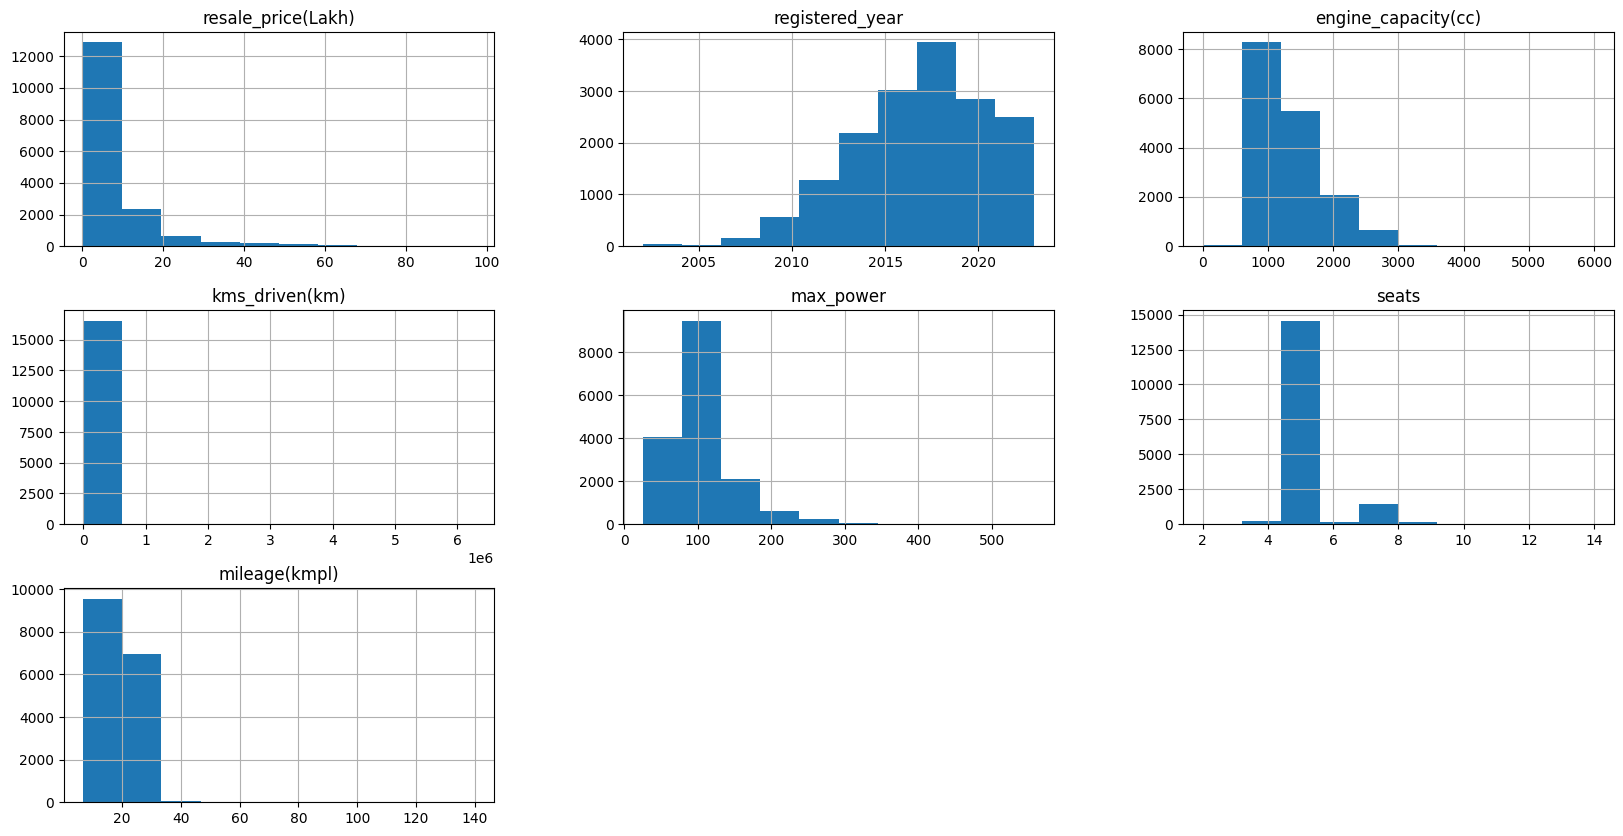

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(20,10))
plt.show()

summary

Resale Price (Lakh):

The distribution is heavily skewed to the left, indicating that most resale prices are low, with a very few high-price outliers.

Registered Year:

This graph shows a peak around 2015, suggesting a higher number of cars registered in that year, with fewer registrations in the years before and after.

Engine Capacity (cc):

The distribution is slightly right-skewed, with most cars having engine capacities below 2000 cc, and a notable drop-off for higher capacities.

Kms Driven (km):

Similar to resale price, this plot shows that most vehicles have been driven relatively short distances, with a few high-mileage outliers.

Max Power:

The majority of cars show max power ratings between 50 and 150 bhp, with fewer vehicles reporting lower or higher power levels.

Seats:

Most cars have either 4 or 5 seats, with almost no vehicles having more than 7, suggesting a focus on standard passenger vehicles.

Mileage (kmpl):

This distribution appears to cluster around 20-25 kmpl, implying that fuel efficiency in this range is common.


# step5: Correlation Analysis

In [539]:
# object value into numerical using labelencoder.fit_transform
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['full_name']= labelencoder.fit_transform(df['full_name'])
df["owner_type"]= labelencoder.fit_transform(df["owner_type"])
# df['insurance']= labelencoder.fit_transform(df['insurance'])
df['fuel_type']= labelencoder.fit_transform(df['fuel_type'])
df['body_type']= labelencoder.fit_transform(df['body_type'])
df['transmission_type']= labelencoder.fit_transform(df['transmission_type'])
df['city']= labelencoder.fit_transform(df['city'])
df



,full_name,resale_price(Lakh),registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,city
0,3089,5.45,2017,1197,Third Party insurance,1,40000,1,4,83.10,5,21.40,7,0
1,4019,10.00,2018,2179,Third Party insurance,0,70000,1,1,153.86,7,17.60,11,0
2,1995,4.50,2015,1197,Third Party insurance,1,70000,3,4,83.14,5,20.85,19,0
4,187,1.60,2009,1086,Third Party insurance,1,80000,1,4,68.05,5,19.81,7,0
5,1879,4.70,2015,1197,Third Party insurance,1,70000,1,4,81.86,5,17.19,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,975,3.25,2013,1198,Comprehensive,1,89000,3,4,86.70,5,18.00,19,5
17442,2680,20.75,2016,2494,Comprehensive,0,68000,1,4,157.70,5,19.16,19,5
17443,2686,8.35,2016,1798,Comprehensive,1,81000,1,4,138.03,5,14.28,19,5
17444,4269,13.95,2019,1582,Comprehensive,0,20000,1,1,126.20,5,17.01,18,5


In [540]:
df["insurance"].unique()

array(['Third Party insurance', 'Comprehensive', 'Zero Dep',
       'Third Party', 'Not Available', '2', '1'], dtype=object)

In [541]:
df["insurance"].value_counts()

,count
insurance,
Third Party insurance,6938
Comprehensive,6246
Third Party,1940
Zero Dep,834
Not Available,597
1,5
2,3


In [542]:
insurance_mapping = {
    'Third Party insurance': 0,
    'Comprehensive': 1,
    'Zero Dep': 2,
    'Not Available': 3,
    'Third Party': 4,
    'Third party': 5 # Added for consistency
}
df['insurance'] = df['insurance'].map(insurance_mapping)

* **Purpose**: Converts categorical insurance types in the insurance column to numerical values for machine learning model compatibility.

* **Method**: Uses a dictionary (insurance_mapping) to map insurance types (keys) to numerical codes (values).

* **Implementation**: Applies the mapping to the DataFrame using the .map() function, replacing text with numbers in the insurance column.

* **Importance**: Makes the data suitable for numerical analysis and machine learning algorithms.

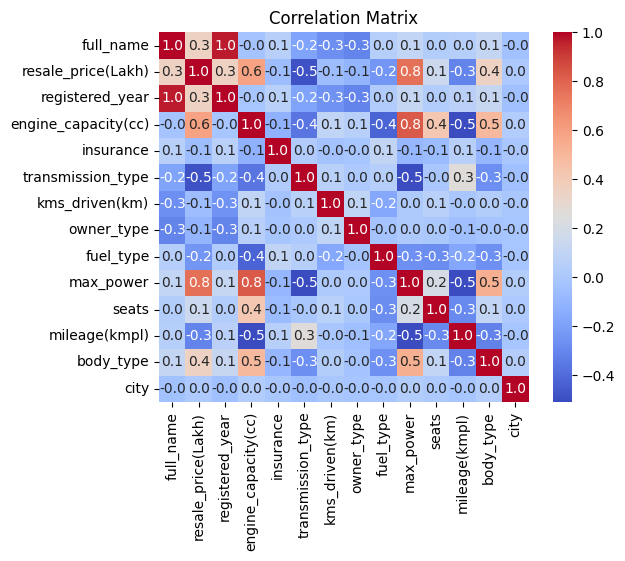

In [543]:
# Correlation Heatmap
Corr_matrix=df.corr()

sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

In [544]:
# Droping the columns of "registered_year" and "engine_capacity(cc)" equal Correlation
df.drop(columns=['registered_year'],inplace=True)
df.drop(columns=['engine_capacity(cc)'],inplace=True)
df.drop(columns=['city'],inplace=True)

* **Purpose**: Removes the registered_year, engine_capacity(cc), and city columns from the DataFrame df.

* **Method**: Uses the df.drop() function with inplace=True to modify the DataFrame directly.

* **Reason**: Likely due to high correlation with other features, which can cause redundancy and issues in machine learning models.

* **Benefits**: Simplifies the model, potentially improves performance, and increases robustness.

* **Prior Step**: Ideally, this would be based on a correlation analysis performed earlier in the code.

In [545]:
Corr_matrix

,full_name,resale_price(Lakh),registered_year,engine_capacity(cc),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,city
full_name,1.000000,0.349271,0.965943,-0.027459,0.054911,-0.179324,-0.271941,-0.309480,0.045388,0.108776,0.034158,0.049947,0.111548,-0.040551
resale_price(Lakh),0.349271,1.000000,0.346930,0.593288,-0.066031,-0.487371,-0.066080,-0.104432,-0.239509,0.764130,0.148956,-0.314219,0.356957,0.004294
registered_year,0.965943,0.346930,1.000000,-0.016825,0.062878,-0.183606,-0.259476,-0.310791,0.027188,0.116463,0.028646,0.067496,0.125738,-0.043433
engine_capacity(cc),-0.027459,0.593288,-0.016825,1.000000,-0.114831,-0.365089,0.095796,0.052519,-0.424661,0.827326,0.418904,-0.508675,0.490555,0.029568
insurance,0.054911,-0.066031,0.062878,-0.114831,1.000000,0.026589,-0.031664,-0.017633,0.103812,-0.092829,-0.067362,0.056078,-0.091950,-0.011306
transmission_type,-0.179324,-0.487371,-0.183606,-0.365089,0.026589,1.000000,0.057329,0.009541,0.047485,-0.509717,-0.012787,0.258631,-0.269500,-0.047024
kms_driven(km),-0.271941,-0.066080,-0.259476,0.095796,-0.031664,0.057329,1.000000,0.095061,-0.165206,0.011862,0.062857,-0.005879,0.034779,-0.009783
owner_type,-0.309480,-0.104432,-0.310791,0.052519,-0.017633,0.009541,0.095061,1.000000,-0.026204,0.005942,0.003564,-0.050357,-0.027167,-0.015773
fuel_type,0.045388,-0.239509,0.027188,-0.424661,0.103812,0.047485,-0.165206,-0.026204,1.000000,-0.261246,-0.277364,-0.170242,-0.264125,-0.014964
max_power,0.108776,0.764130,0.116463,0.827326,-0.092829,-0.509717,0.011862,0.005942,-0.261246,1.000000,0.202634,-0.514829,0.535034,0.035500


# Step6:Outlier Detection:

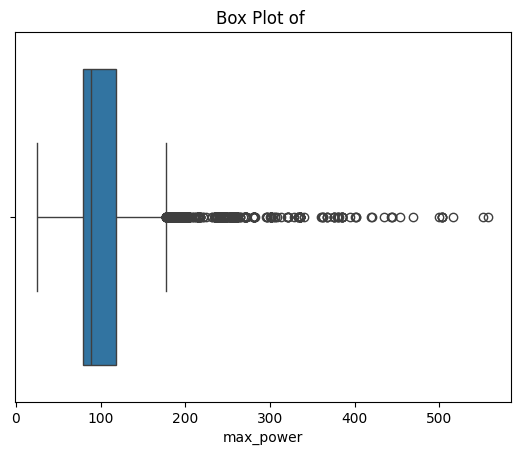

Number of outliers in : 354


In [546]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['max_power'])
plt.title('Box Plot of ')
plt.show()

# Z-score to detect outliers        [(x-Mean)/std. Deviation]
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['max_power']))
outliers = df[z_scores > 3]
print(f'Number of outliers in : {outliers.shape[0]}')


,0
full_name,"Axes(0.125,0.747241;0.227941x0.132759)"
resale_price(Lakh),"Axes(0.398529,0.747241;0.227941x0.132759)"
insurance,"Axes(0.672059,0.747241;0.227941x0.132759)"
transmission_type,"Axes(0.125,0.587931;0.227941x0.132759)"
kms_driven(km),"Axes(0.398529,0.587931;0.227941x0.132759)"
owner_type,"Axes(0.672059,0.587931;0.227941x0.132759)"
fuel_type,"Axes(0.125,0.428621;0.227941x0.132759)"
max_power,"Axes(0.398529,0.428621;0.227941x0.132759)"
seats,"Axes(0.672059,0.428621;0.227941x0.132759)"
mileage(kmpl),"Axes(0.125,0.26931;0.227941x0.132759)"


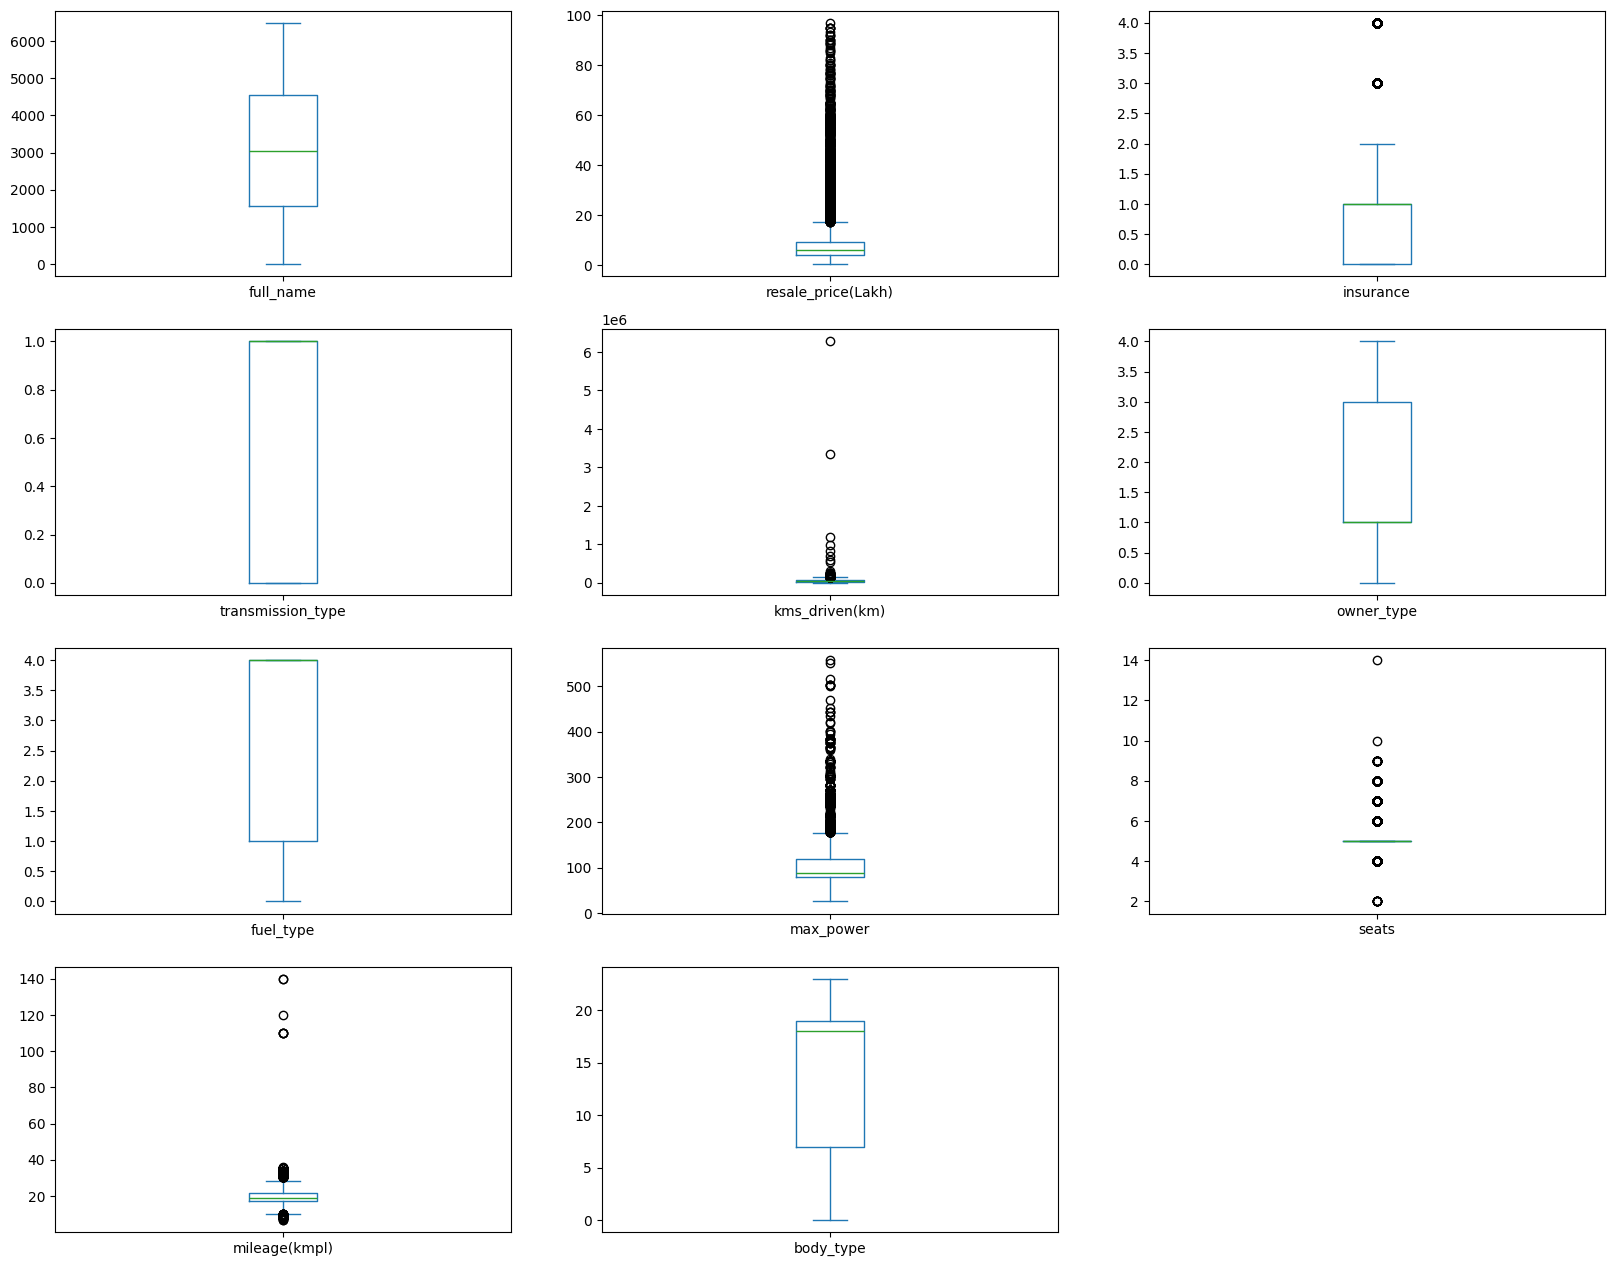

In [547]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16563 entries, 0 to 17445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_name           16563 non-null  int64  
 1   resale_price(Lakh)  16563 non-null  float64
 2   insurance           16555 non-null  float64
 3   transmission_type   16563 non-null  int64  
 4   kms_driven(km)      16563 non-null  int64  
 5   owner_type          16563 non-null  int64  
 6   fuel_type           16563 non-null  int64  
 7   max_power           16563 non-null  float64
 8   seats               16563 non-null  int64  
 9   mileage(kmpl)       16563 non-null  float64
 10  body_type           16563 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [549]:
for column in df.columns:
    if column != 'resale_price_in_lakh':
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - 1.5 * IQR
        Upper_bound = Q3 + 1.5 * IQR
        outliers = [x for x in df[column] if x < Lower_bound or x > Upper_bound]
        if outliers:
            print(f"Column: {column}")
            # print(f"Lower Bound: {Lower_bound}")
            # print(f"Upper Bound: {Upper_bound}")
            print(f"Outliers: {outliers}")
            print(f"Number of Outliers: {len(outliers)}")
            # print("-" * 20)  # Separator for better readability
            print('\n\n')

Column: resale_price(Lakh)
Outliers: [19.22, 25.0, 24.8, 46.9, 21.9, 22.9, 27.9, 36.9, 24.9, 89.0, 20.9, 26.8, 94.9, 94.9, 37.8, 29.8, 64.9, 51.9, 47.9, 20.9, 19.9, 27.8, 26.9, 32.9, 22.9, 26.9, 18.9, 91.75, 55.75, 18.0, 53.75, 19.0, 31.5, 32.5, 29.7, 22.5, 26.0, 18.0, 21.8, 78.0, 20.0, 44.75, 28.75, 33.75, 22.75, 33.75, 57.75, 43.75, 54.75, 27.75, 40.75, 37.75, 17.75, 39.75, 38.75, 37.75, 44.75, 71.75, 28.25, 72.0, 38.75, 85.75, 19.0, 42.5, 43.75, 39.65, 29.0, 38.75, 53.5, 45.5, 18.0, 53.75, 55.75, 51.5, 35.75, 36.85, 19.8, 55.5, 23.25, 88.0, 59.8, 66.75, 22.5, 49.5, 55.99, 32.65, 55.75, 35.0, 40.0, 29.5, 28.5, 18.75, 24.5, 18.51, 38.5, 53.75, 59.5, 19.75, 28.75, 95.0, 35.9, 41.75, 24.75, 44.5, 49.5, 20.25, 46.5, 49.5, 21.0, 38.75, 32.5, 28.0, 20.95, 20.0, 33.97, 20.0, 19.0, 34.0, 37.5, 18.0, 36.0, 20.5, 89.0, 38.5, 28.0, 17.45, 51.9, 55.0, 29.0, 75.0, 34.0, 64.0, 47.0, 43.0, 65.0, 44.9, 38.0, 20.0, 53.0, 53.0, 38.0, 85.0, 34.0, 27.99, 56.5, 24.0, 39.95, 17.5, 17.5, 61.0, 29.75, 85.9,

* Locating the columns containing outliers.

* Showing the specific outlier values.

* Indicating the number of outliers in each column.

In [550]:
# copying the data set into another variable
df1=df.copy()

In [551]:
# Removing outliers using IQR method
x=["kms_driven(km)",'seats',"mileage(kmpl)","max_power"]
for i in x:
  data=df1[i]
  Q1=np.quantile(data,0.25)
  Q2=np.quantile(data,0.50)
  Q3=np.quantile(data,0.75)
  iqr=Q3-Q1
  lower=Q1-(1.5*iqr)
  upper=Q3+(1.5*iqr)
  outliers=[j for j in data if j<lower or j>upper]
  df1=df1[(df1[i]>=lower)&(df1[i]<=upper)]

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16563 entries, 0 to 17445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_name           16563 non-null  int64  
 1   resale_price(Lakh)  16563 non-null  float64
 2   insurance           16555 non-null  float64
 3   transmission_type   16563 non-null  int64  
 4   kms_driven(km)      16563 non-null  int64  
 5   owner_type          16563 non-null  int64  
 6   fuel_type           16563 non-null  int64  
 7   max_power           16563 non-null  float64
 8   seats               16563 non-null  int64  
 9   mileage(kmpl)       16563 non-null  float64
 10  body_type           16563 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [553]:
df1.info()
df1['seats'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 12936 entries, 0 to 17445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_name           12936 non-null  int64  
 1   resale_price(Lakh)  12936 non-null  float64
 2   insurance           12929 non-null  float64
 3   transmission_type   12936 non-null  int64  
 4   kms_driven(km)      12936 non-null  int64  
 5   owner_type          12936 non-null  int64  
 6   fuel_type           12936 non-null  int64  
 7   max_power           12936 non-null  float64
 8   seats               12936 non-null  int64  
 9   mileage(kmpl)       12936 non-null  float64
 10  body_type           12936 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.2 MB


array([5])

In [554]:
# Removing outliers using z_scores method
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats
# import numpy as np

# # Sample DataFrame (replace with your own DataFrame)
# # df = pd.read_csv('your_file.csv')

# # Loop through all numerical columns in the DataFrame
# for column in df1.select_dtypes(include=[np.number]).columns:
#     # Visual detection of outliers using a box plot
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(x=df1[column])
#     plt.title(f'Box Plot of {column}')
#     plt.show()


#     # Z-score to detect outliers [(x-Mean)/std. Deviation]
#     z_scores = np.abs(stats.zscore(df1[column]))
#     outliers = df1[z_scores > 3]

#     print(f'Number of outliers in {column}: {outliers.shape[0]}')

In [555]:
df1

,full_name,resale_price(Lakh),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type
0,3089,5.45,0.0,1,40000,1,4,83.10,5,21.40,7
2,1995,4.50,0.0,1,70000,3,4,83.14,5,20.85,19
4,187,1.60,0.0,1,80000,1,4,68.05,5,19.81,7
5,1879,4.70,0.0,1,70000,1,4,81.86,5,17.19,7
6,3336,3.60,0.0,1,120000,1,1,69.00,5,27.28,7
...,...,...,...,...,...,...,...,...,...,...,...
17441,975,3.25,1.0,1,89000,3,4,86.70,5,18.00,19
17442,2680,20.75,1.0,0,68000,1,4,157.70,5,19.16,19
17443,2686,8.35,1.0,1,81000,1,4,138.03,5,14.28,19
17444,4269,13.95,1.0,0,20000,1,1,126.20,5,17.01,18


# Step 7 : Feature Engineering

In [556]:
import numpy as np
df1.info()
df1.skew()
# Apply log transformation to the numerical data within the DataFrame
x=['full_name','resale_price(Lakh)','insurance','transmission_type','kms_driven(km)','owner_type','fuel_type','max_power','seats','mileage(kmpl)','body_type',]
for i in x :
  df1[i]=np.log1p(df1[i])
df1

<class 'pandas.core.frame.DataFrame'>
Index: 12936 entries, 0 to 17445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_name           12936 non-null  int64  
 1   resale_price(Lakh)  12936 non-null  float64
 2   insurance           12929 non-null  float64
 3   transmission_type   12936 non-null  int64  
 4   kms_driven(km)      12936 non-null  int64  
 5   owner_type          12936 non-null  int64  
 6   fuel_type           12936 non-null  int64  
 7   max_power           12936 non-null  float64
 8   seats               12936 non-null  int64  
 9   mileage(kmpl)       12936 non-null  float64
 10  body_type           12936 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.2 MB


,full_name,resale_price(Lakh),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type
0,8.035926,1.864080,0.000000,0.693147,10.596660,0.693147,1.609438,4.432007,1.791759,3.109061,2.079442
2,7.598900,1.704748,0.000000,0.693147,11.156265,1.386294,1.609438,4.432482,1.791759,3.084201,2.995732
4,5.236442,0.955511,0.000000,0.693147,11.289794,0.693147,1.609438,4.234831,1.791759,3.035434,2.079442
5,7.539027,1.740466,0.000000,0.693147,11.156265,0.693147,1.609438,4.417152,1.791759,2.900872,2.079442
6,8.112827,1.526056,0.000000,0.693147,11.695255,0.693147,0.693147,4.248495,1.791759,3.342155,2.079442
...,...,...,...,...,...,...,...,...,...,...,...
17441,6.883463,1.446919,0.693147,0.693147,11.396403,1.386294,1.609438,4.473922,1.791759,2.944439,2.995732
17442,7.893945,3.079614,0.693147,0.000000,11.127278,0.693147,1.609438,5.067016,1.791759,3.003700,2.995732
17443,7.896181,2.235376,0.693147,0.693147,11.302217,0.693147,1.609438,4.934690,1.791759,2.726545,2.995732
17444,8.359369,2.704711,0.693147,0.000000,9.903538,0.693147,0.693147,4.845761,1.791759,2.890927,2.944439


# Step 8 : Dimensionality Reduction

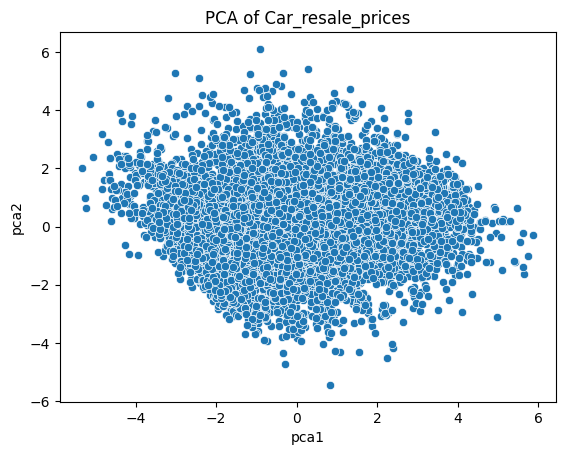

In [558]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Standardize the features before PCA
features = ['full_name','resale_price(Lakh)','insurance','transmission_type','kms_driven(km)','owner_type','fuel_type','max_power','mileage(kmpl)','body_type',]
X = StandardScaler().fit_transform(df1[features])

# Impute NaN values using the mean
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed
X = imputer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', data=df1)
plt.title('PCA of Car_resale_prices')
plt.show()

In summary,

 This code snippet uses PCA to reduce the dimensionality of the car resale price dataset to two principal components. It standardizes the data, applies PCA, adds the principal components to the DataFrame, and visualizes the results using a scatter plot. This technique can be helpful for simplifying the dataset while retaining important information, which can be useful for further analysis and modeling.

In [559]:
df1

,full_name,resale_price(Lakh),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,pca1,pca2
0,8.035926,1.864080,0.000000,0.693147,10.596660,0.693147,1.609438,4.432007,1.791759,3.109061,2.079442,-0.446120,-0.923213
2,7.598900,1.704748,0.000000,0.693147,11.156265,1.386294,1.609438,4.432482,1.791759,3.084201,2.995732,-0.546502,1.236682
4,5.236442,0.955511,0.000000,0.693147,11.289794,0.693147,1.609438,4.234831,1.791759,3.035434,2.079442,-3.086677,1.034819
5,7.539027,1.740466,0.000000,0.693147,11.156265,0.693147,1.609438,4.417152,1.791759,2.900872,2.079442,-0.661967,0.201674
6,8.112827,1.526056,0.000000,0.693147,11.695255,0.693147,0.693147,4.248495,1.791759,3.342155,2.079442,-1.980299,-0.679103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,6.883463,1.446919,0.693147,0.693147,11.396403,1.386294,1.609438,4.473922,1.791759,2.944439,2.995732,-0.868163,1.968040
17442,7.893945,3.079614,0.693147,0.000000,11.127278,0.693147,1.609438,5.067016,1.791759,3.003700,2.995732,3.522931,1.006205
17443,7.896181,2.235376,0.693147,0.693147,11.302217,0.693147,1.609438,4.934690,1.791759,2.726545,2.995732,2.016819,1.709542
17444,8.359369,2.704711,0.693147,0.000000,9.903538,0.693147,0.693147,4.845761,1.791759,2.890927,2.944439,3.367790,0.257820


#Step9: Data Scaling

In [560]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()
min=MinMaxScaler()
df1[['full_name', 'insurance', 'transmission_type','kms_driven(km)','owner_type','fuel_type','max_power','seats','mileage(kmpl)','body_type',]]=sc.fit_transform(df1[['full_name', 'insurance',
    'transmission_type','kms_driven(km)','owner_type','fuel_type','max_power','seats','mileage(kmpl)','body_type',]])

Why is Data Scaling Important?

Many machine learning algorithms work better when the features (the input variables) are on a similar scale. Standardization helps achieve this by centering the data around zero and scaling it to have a standard deviation of one. This prevents features with larger values from dominating the model and can improve the performance and stability of the algorithm.

# Step 10: Inital Modeling and Hypothesis Testing

In [561]:
df1

,full_name,resale_price(Lakh),insurance,transmission_type,kms_driven(km),owner_type,fuel_type,max_power,seats,mileage(kmpl),body_type,pca1,pca2
0,0.322880,1.864080,-1.017059,0.532051,-0.180474,-0.600157,0.547402,-0.188931,2.220446e-16,0.477779,-0.963353,-0.446120,-0.923213
2,-0.170877,1.704748,-1.017059,0.532051,0.609608,1.517145,0.547402,-0.187003,2.220446e-16,0.310175,1.081859,-0.546502,1.236682
4,-2.840007,0.955511,-1.017059,0.532051,0.798132,-0.600157,0.547402,-0.988439,2.220446e-16,-0.018610,-0.963353,-3.086677,1.034819
5,-0.238522,1.740466,-1.017059,0.532051,0.609608,-0.600157,0.547402,-0.249161,2.220446e-16,-0.925815,-0.963353,-0.661967,0.201674
6,0.409763,1.526056,-1.017059,0.532051,1.370585,-0.600157,-1.627630,-0.933033,2.220446e-16,2.049280,-0.963353,-1.980299,-0.679103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,-0.979186,1.446919,0.200081,0.532051,0.948648,1.517145,0.547402,-0.018972,2.220446e-16,-0.632089,1.081859,-0.868163,1.968040
17442,0.162468,3.079614,0.200081,-1.879517,0.568682,-0.600157,0.547402,2.385906,2.220446e-16,-0.232553,1.081859,3.522931,1.006205
17443,0.164994,2.235376,0.200081,0.532051,0.815671,-0.600157,0.547402,1.849351,2.220446e-16,-2.101115,1.081859,2.016819,1.709542
17444,0.688309,2.704711,0.200081,-1.879517,-1.159063,-0.600157,-1.627630,1.488761,2.220446e-16,-0.992862,0.967370,3.367790,0.257820


In [562]:
# Modeling and Testing the dataset
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
model =DecisionTreeRegressor()
x = df1[[  "full_name", "insurance","transmission_type",    "kms_driven(km)",   "owner_type",   "fuel_type",    "max_power",   "seats",   "mileage(kmpl)",   "body_type" ,"pca1","pca2"]]
y = df1["resale_price(Lakh)"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)   #spliting the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [563]:
# fiting the model
r2=r2_score(y_test,y_pred)
print(f'Baseline model r2score: {r2}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Baseline model mae: {mae}')
mse=mean_squared_error(y_test,y_pred)
print(f'Baseline model mse: {mse}')
rmse=sqrt(mse)
print(f'Baseline model rmse: {rmse}')
perer=[((np.abs(y_test-y_pred))/y_test)*100]
print(f'Baseline model percentage error: {np.mean(perer)}')

Baseline model r2score: 0.9177487934168193
Baseline model mae: 0.09923068451074772
Baseline model mse: 0.018132612982830067
Baseline model rmse: 0.1346573911184606
Baseline model percentage error: 6.1139366214613275


#Project Overview

Project Title: Car Resale Price Prediction
Project Goal: To predict the resale price of cars based on various features.
Problem Statement: Resale price prediction.

Data Source: Briefly mention where you got the car resale price dataset (e.g., "Kaggle").

##Data Description

Features: List and explain each column in the dataset (e.g., 'full_name', 'resale_price', 'registered_year', 'engine_capacity', etc.).

Target Variable: Clearly state that the target variable is the 'resale_price' of the car.

##Exploratory Data Analysis (EDA)

Understanding the Data: Briefly describe the initial steps taken to explore and understand the dataset. Mention the methods used, like head, sample, shape, info.

Data Cleaning: Explain the data cleaning process, such as dropping unnecessary columns (e.g., 'Unnamed: 0'), handling missing values, and converting data types.

Descriptive Statistics: Provide summary statistics, including mean, median, standard deviation, and quartiles for numerical features.

Data Visualization: Mention the types of visualizations used (e.g., histograms, bar plots, scatter plots) and what insights they provided.

Correlation Analysis: Discuss any strong correlations observed between features and the target variable.

Outlier Detection: Explain the methods used to detect and handle outliers (e.g., box plots, Z-score, IQR).

Feature Engineering: Describe any feature engineering steps taken, such as log transformations to reduce skewness or creating new features from existing ones.
Dimensionality Reduction: If you applied dimensionality reduction techniques like PCA, explain the purpose and results.

Data Scaling: Mention the scaling method used (e.g., StandardScaler, MinMaxScaler).

##Modeling


Model Selection: Explain why you chose the Decision Tree Regressor for this project.

Model Training: Briefly describe the process of training the model, including splitting the data into training and testing sets.

Model Evaluation: Report the performance metrics used (e.g., R-squared, MAE, MSE, RMSE, percentage error). Include the results achieved by the model.